In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.utils import check_random_state
# %matplotlib inline

In [22]:
# Data is already preprocessed here
df = pd.read_csv('./data_json_preprocessed.csv')
df.tail()

,Unnamed: 0,horas_disponiveis,tipo_user,user_id,adtech,agritech,biotech,edtech,fashiontech,fintech,...,machine-learning,marketing-digital,photoshop,php,python,react,scikit-learn,scrum,scss,seo
114,114,-0.556740,1,133,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
115,115,0.117209,1,134,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
116,116,-1.230689,1,135,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
117,117,1.465106,0,136,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
118,118,-1.230689,1,137,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [23]:
X = df.iloc[:,1:]
X


,horas_disponiveis,tipo_user,user_id,adtech,agritech,biotech,edtech,fashiontech,fintech,healthtech,...,machine-learning,marketing-digital,photoshop,php,python,react,scikit-learn,scrum,scss,seo
0,0.117209,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0
1,1.465106,1,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-1.230689,0,2,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.117209,0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1.465106,0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,-1.230689,0,5,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,-1.230689,0,6,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
7,-0.556740,1,7,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,-0.556740,0,8,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1.465106,0,9,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [48]:
tsne = TSNE(n_iter=2000, random_state=42)
reduced = tsne.fit_transform(X).T
reduced.shape

(2, 119)

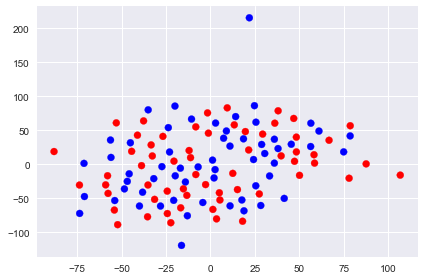

In [49]:
random_state = check_random_state(42)
p = random_state.rand(len(reduced)) * (2 * np.pi - 0.55)
t = random_state.rand(len(reduced)) * np.pi
indices = ((t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8))))
colors = p[indices]
colors
plt.scatter(reduced[0], reduced[1], c=['r','b'], cmap=plt.cm.rainbow)
plt.tight_layout()
plt.show()

In [55]:
# Separando em conjunto de train e test
percentage = 0.7
X_train = X[:int(len(X)*percentage)]
X_test = X[int(len(X)*percentage):]
X_train.shape

(83, 31)

In [59]:
model = KMeans(n_clusters=int(np.sqrt(31/2)),random_state=42,max_iter=2000)

predicted = model.fit_predict(X)

In [60]:
predicted.shape

(119,)

83.3